<a href="https://colab.research.google.com/github/JulianDelgadoRodriguez/IAyRN2024/blob/main/Copia_de_PIA_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
!pip install kaggle
from google.colab import files

In [4]:
files.upload()

Saving login (1).htm to login (1).htm


{'login (1).htm': b'\r\n\r\n<!DOCTYPE html>\r\n<html lang="en">\r\n\r\n<head>\r\n  <title>Kaggle: Your Home for Data Science</title>\r\n  <meta charset="utf-8" />\r\n    <meta name="robots" content="index, follow" />\r\n  <meta name="description" content="Kaggle is the world&#x2019;s largest data science community with powerful tools and resources to help you achieve your data science goals." />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0">\r\n  <meta name="theme-color" content="#008ABC" />\r\n  <script nonce="/5TeUXSWCOX2KPze&#x2B;QiDug==" type="text/javascript">\r\n    window["pageRequestStartTime"] = 1717112842116;\r\n    window["pageRequestEndTime"] = 1717112842121;\r\n    window["initialPageLoadStartTime"] = new Date().getTime();\r\n  </script>\r\n  <script nonce="/5TeUXSWCOX2KPze&#x2B;QiDug==" id="gsi-client" src="https://accounts.google.com/gsi/client" async defer></script>\r\n  <script nonce="/5TeUXSWCOX2KPze

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d joosthazelzet/lego-brick-images

Dataset URL: https://www.kaggle.com/datasets/joosthazelzet/lego-brick-images
License(s): GPL-2.0
 98% 0.98G/1.00G [00:12<00:00, 127MB/s]
100% 1.00G/1.00G [00:12<00:00, 88.0MB/s]


In [7]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path ='/content/lego-brick-images.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [8]:
imagenes = []
etiquetas = []

In [9]:
carpeta_principal = '/content/Dataset/LEGO brick images v1'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.png'):
          print(x)
          test_image = cv2.imread(x)

          # Formato de imagen
          img_resized = cv2.resize(test_image, (200,200), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(z)
    z += 1

Se han truncado las últimas 5000 líneas del flujo de salida.
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0193.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0161.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0221.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0212.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0075.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0023.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0003.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0276.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0074.png
/content/Dataset/LEGO brick images v1/18651 Cros

In [10]:
etiquetas = np.array(etiquetas)

In [11]:
imagenes = np.array(imagenes)

In [12]:
np.shape(imagenes)

(6379, 200, 200, 3)

In [13]:
len(etiquetas)

6379

In [14]:
etiquetas[+1]

0

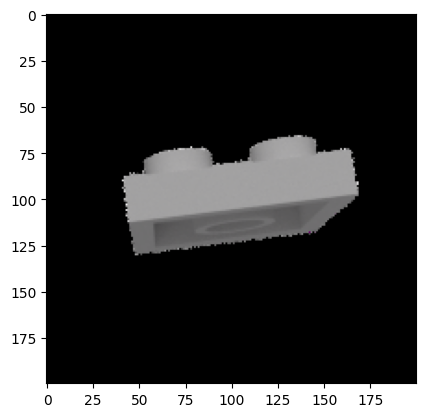

In [15]:
plt.imshow(imagenes[10])

In [16]:
images_train, images_test, labels_train, labels_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [17]:
images_train, images_test = images_train / 255.0, images_test / 255.0

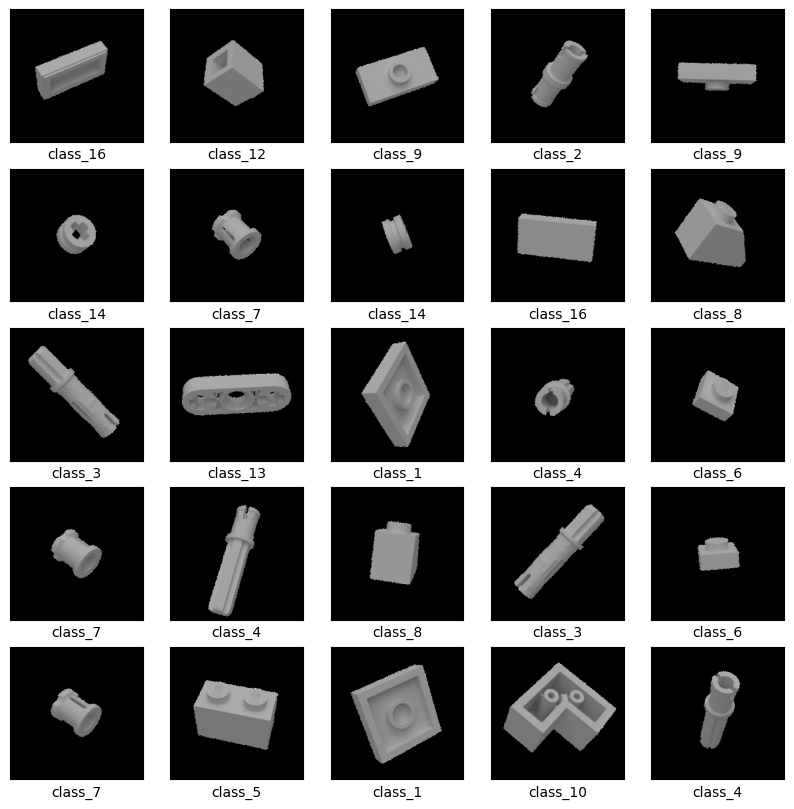

In [18]:
class_names = ['class_1', 'class_2', 'class_3', 'class_4', 'class_5',
 'class_6', 'class_7', 'class_8', 'class_9', 'class_10',
 'class_11', 'class_12', 'class_13', 'class_14', 'class_15',
 'class_16']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[labels_train[i]])
plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
Total params: 56032 (218.88 KB)
Trainable params: 56032 

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 135424)            0

In [2]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(images_train, labels_train, epochs=10,
                    validation_data=(images_test, labels_test))

NameError: name 'model' is not defined